### Machine Learning - Supervised Learning

### Model devlopment Steps

Linear Regression is one of the most fundamental algorithms in the Machine Learning world. It is the door to the magical world ahead.

But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

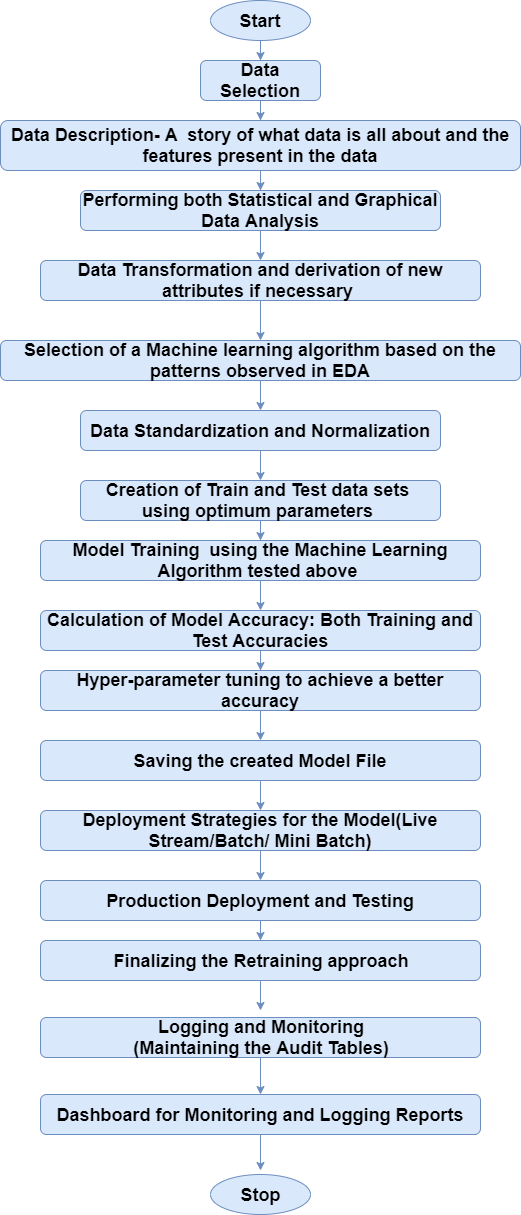



Now, let's take our discussion of Linear Regression further.

## What is Regression Analysis?

Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.


Regression analysis is an important tool for analysing and modelling data. Here, we fit a curve/line to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum. The topic will be explained in detail in the coming sections.

## What is regression?

Predictive modelling technique which evaluates the relation between dependent (ie the target variable) and independent variables is known as regression analysis. Regression analysis can be used for forecasting, time series modelling or finding the relation between the variables and predict continuous values. For example, the relation between household regions and the electricity bill of the household by a driver is best studied through regression.

There are two basic types of regression techniques, which are simple linear regression and multiple linear regression, for more complicated data and analysis we use non-linear regression method like polynomial regression. Simple linear regression uses only one independent variable to create the prediction output of the dependent variable Y, whereas multiple linear regression uses two or more independent variables to create prediction outcome.

The general equation of a regression algorithms are as follows: 

###### Simple linear regression: Y = a + b*X + u
###### Multiple linear regression: Y = a + b1*X1 + b2*X2 + b3*X3 + ... + bt*Xt + u

Where:

Y = Dependent variable

X = Independent variable

a = the intercept of regression line.

b = the slope.

u = the regression remainder.

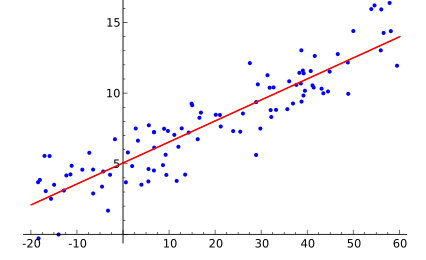

### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#% matpllotlib inline

In [2]:
data= pd.read_csv('Advertising.csv') # Reading the data file

In [3]:
data.head() # checking the first five rows from the dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
data.shape

(200, 5)

In [5]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum() # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

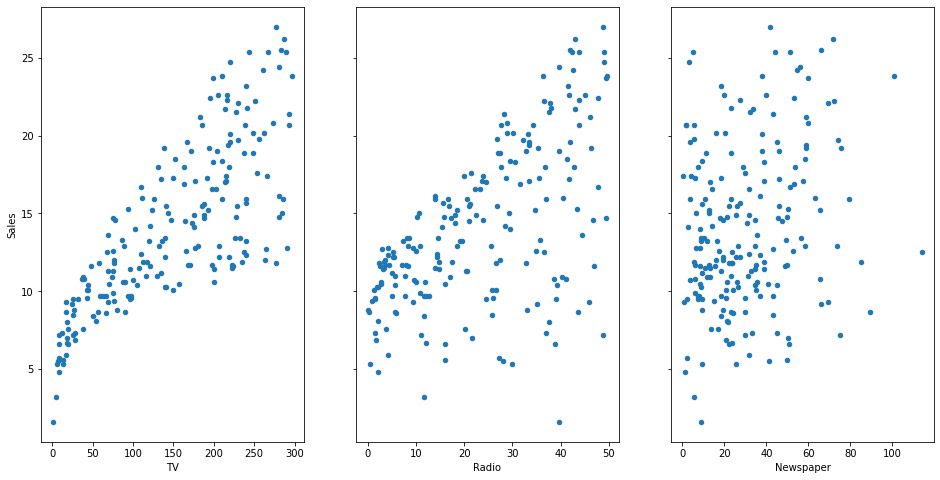

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:
1. What’s the relationship between ads and sales?
2. How prominent is that relationship?
3. Which ad types contribute to sales?
4. How each ad contributes to sales?
5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!


From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad,  Radio ad and the sales is almost a linear one. A linear relationship typically looks like:

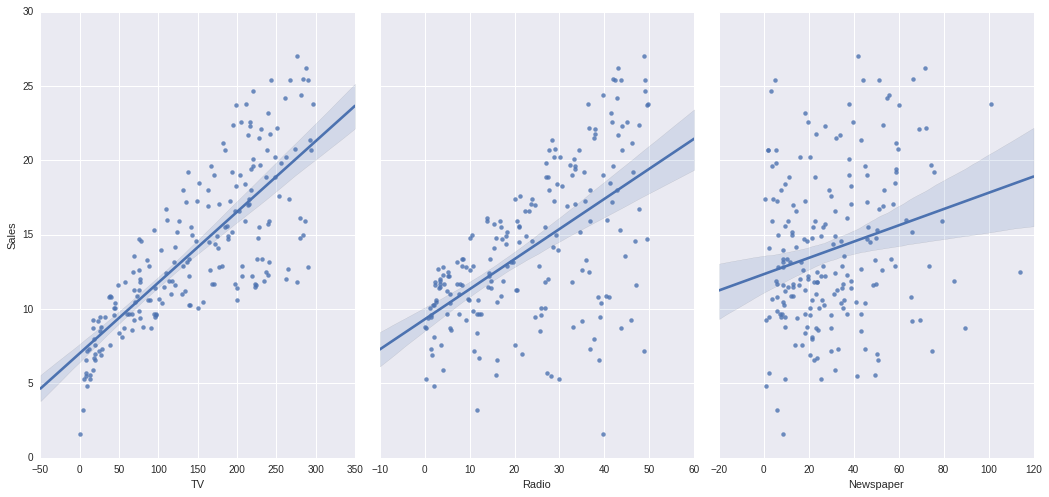

Hence, we can build a model using the Linear Regression Algorithm.

## Simple Linear Regression

Simple Linear regression is a method for predicting a **quantitative response** using a **single feature** ("input variable"). The mathematical equation is:

$y = \beta_0 + \beta_1x$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $\beta_1$ is the coefficient of x
- $\beta_0$ is the intercept

$\beta_0$ and $\beta_1$ are the **model coefficients**. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!

#### Estimating ("Learning") Model Coefficients

The coefficients are estimated using the **least-squares criterion**,  i.e., the best fit line has to be calculated that minimizes the **sum of squared residuals** (or "sum of squared errors").

### The mathematics involved
Take a quick look at the plot created. Now consider each point, and know that each of them has a coordinate in the form (X, Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distance between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

What elements are present in the diagram?
- The red points are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The green lines are the **residuals**, which is the distance between the observed values and the least squares line.

The general equation of a straight line is:$$𝑦={mx+b}$$

It means that if we have the value of m and b, we can predict all the values of y for corresponding x.
During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line.
But the question is:

#### How Do you Know this is the best fit line?
The best fit line is obtained by minimizing the _residual_.
Residual is the distance between the actual Y and the predicted Y, as shown below:

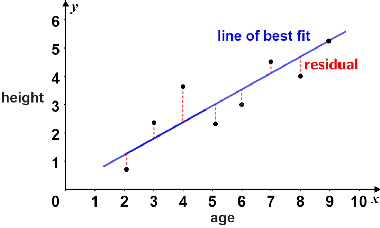

Mathematically, Residual is: $$r={y-(mx+b)}$$
Hence, the sum of the square of residuals is:

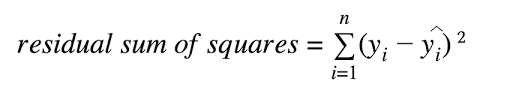

##### What Is Cost Function in Machine Learning?

After training your model, you need to see how well your model is performing. While accuracy functions tell you how well the model is performing, they do not provide you with an insight on how to better improve them. Hence, you need a correctional function that can help you compute when the model is the most accurate, as you need to hit that small spot between an undertrained model and an overtrained model. 

A Cost Function is used to measure just how wrong the model is in finding a relation between the input and output. It tells you how badly your model is behaving/predicting

##### What is Cost Function in Machine Learning

Gradient Descent is an algorithm that is used to optimize the cost function or the error of the model. It is used to find the minimum value of error possible in your model.

Gradient Descent can be thought of as the direction you have to take to reach the least possible error. The error in your model can be different at different points, and you have to find the quickest way to minimize it, to prevent resource wastage.

Gradient Descent can be visualized as a ball rolling down a hill. Here, the ball will roll to the lowest point on the hill. It can take this point as the point where the error is least as for any model, the error will be minimum at one point and will increase again after that.

In gradient descent, you find the error in your model for different values of input variables. This is repeated, and soon you see that the error values keep getting smaller and smaller. Soon you’ll arrive at the values for variables when the error is the least, and the cost function is optimized.

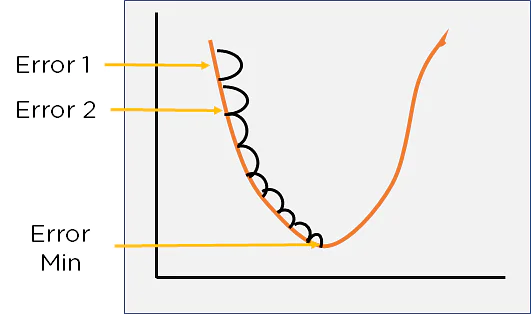

##### What Is the Cost Function For Linear Regression?

A Linear Regression model uses a straight line to fit the model. This is done using the equation for a straight line as shown : 
    
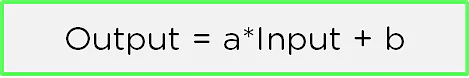

In the equation, you can see that two entities can have changeable values (variable) a, which is the point at which the line intercepts the x-axis, and b, which is how steep the line will be, or slope.

At first, if the variables are not properly optimized, you get a line that might not properly fit the model. As you optimize the values of the model, for some variables, you will get the perfect fit. The perfect fit will be a straight line running through most of the data points while ignoring the noise and outliers. A properly fit Linear Regression model looks as shown below :

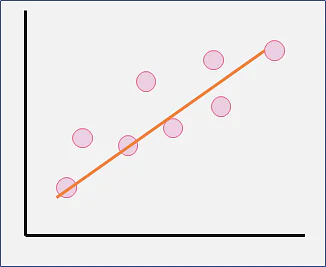

For the Linear regression model, the cost function will be the minimum of the Root Mean Squared Error of the model, obtained by subtracting the predicted values from actual values. The cost function will be the minimum of these error values.

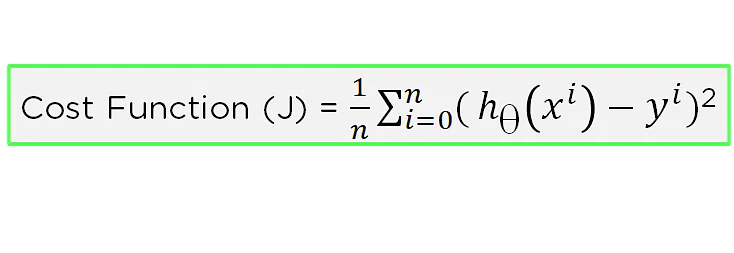


###### Linear Regression Cost Function

By the definition of gradient descent, you have to find the direction in which the error decreases constantly. This can be done by finding the difference between errors. The small difference between errors can be obtained by differentiating the cost function and subtracting it from the previous gradient descent to move down the slope. 

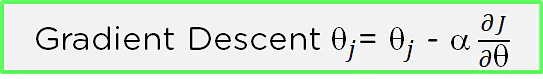

In the above equations, a is known as the learning rate. It decides how fast you move down the slope. If alpha is large, you take big steps, and if it is small; you take small steps. If alpha is too large, you can entirely miss the least error point and our results will not be accurate. If it is too small it will take too long to optimize the model and you will also waste computational power. Hence you need to choose an optimal value of alpha.   

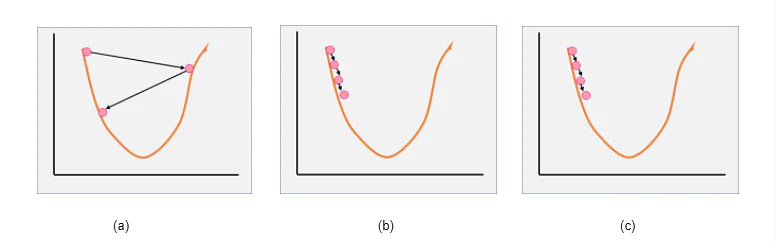

(a) Large learning rate, (b) Small learning rate, (c) Optimum learning rate

### Visualize the how gragient decent will move the best fit line


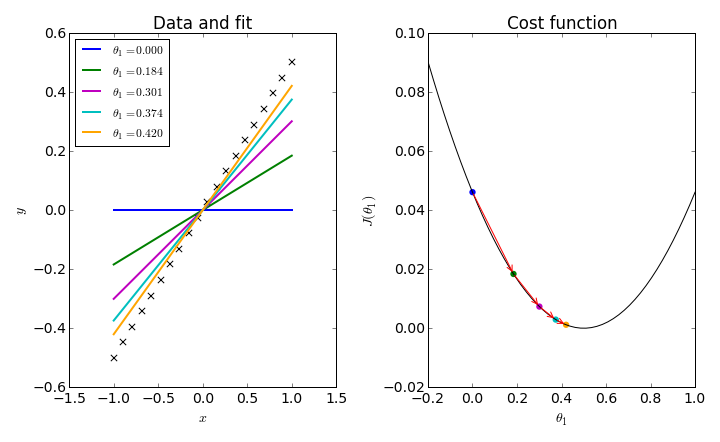

In [11]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


### Interpreting the model

How do we interpret the coefficient for spends on TV ad ($\beta_1$)?
- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.
- Or, an additional $1,000  on TV ads is **translated to** an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Prediction  using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

## The use of Regression

Regression analyses the relationship between two or more features. Let’s take an example:

Let’s suppose we want to make an application which predicts the chances of admission a student to a foreign university. In that case, the 

The benefits of using Regression analysis are as follows:

   * It shows the significant relationships between the Lable (dependent variable) and the features(independent variable).
   * It shows the extent of the impact of multiple independent variables on the dependent variable.
   *  It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.

In [12]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Let's do the same thing using code.

In [13]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [14]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

In [15]:
### Plotting the Least Squares Line

In [16]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [17]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

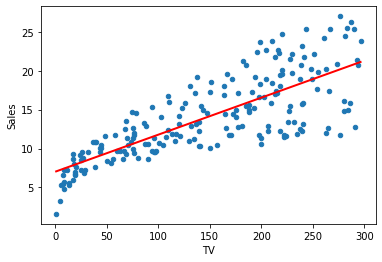

In [19]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Model Confidence

**Question:** Is linear regression a low bias/high variance model or a high bias/low variance model?

**Answer:** It's a High bias/low variance model. Even after repeated sampling, the best fit line will stay roughly in the same position (low variance), but the average of the models created after repeated sampling won't do a great job in capturing the perfect relationship (high bias). Low variance is helpful when we don't have less training data! 

If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: 
If the population from which this sample is drawn, is **sampled 100 times**, then approximately **95 (out of 100) of those confidence intervals** shall contain the "true" coefficients.


In [20]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        11:38:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way actually to know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.


### How Well Does the Model Fit the data?

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the**proportion of variance**, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model. 


In [22]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is it a "good" R-squared value? Now, that’s hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for **comparing different models**.

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.

### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.

### Assumptions of Regression

Let’s see the underlying assumptions: -

Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.

So, how would you check (validate) if a data set follows all regression assumptions? You check it using the regression plots (explained below) along with some statistical test.

Let’s look at the important assumptions in regression analysis:

1) There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

2) There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

3) The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity. i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.

4) The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

5) The mean of the residuals is zero.

6) Independenct features follows normal distribution

### Preparing for Linear regression

Linear Assumption - assumes that the relationship between your input and output is linear. We need to check this using graphs and Correlation plots
Scatter plot plays a vital role here
If we get a curvilinear graph, we cannot use this ML


Remove Noise : Consider Data cleaning you want to clean missing values and treat outliers in the output and input variables 

Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. 

Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. Using transforms   (e.g. log or BoxCox) on variables will helps us.

Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.


### Multiple Linear Regression

Till now, we have created the model based on only one feature. Now, we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients

### Multiple Linear Regression

Till now, we have created the model based on only one feature. Now, we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients


In [25]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


How do we interpret these coefficients? 
If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

### Ordinary least square method

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line. 


In this entry, OLS regression will be discussed in the context of a bivariate model, that is, a model in which there is only one independent variable ( X ) predicting a dependent variable ( Y ). However, the logic of OLS regression is easily extended to the multivariate model in which there are two or more independent variables.

In [26]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        11:39:11   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        11:39:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the things to be learnt from this summary?

- TV and Radio have positive **p-values**, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.
- The expenses on bot TV and Radio ads are **positively associated** with Sales, whereas the expense on newspaper ad is **slightly negatively associated** with the Sales.
- This model has a higher value of **R-squared** (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.


### Feature Selection

How do I decide **which features have to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check if the R-squared value goes up when you add new predictors to the model.

What are the **drawbacks** in this approach?
-If the underlying assumptions for creating a Linear model(the features being independent) are violated(which usually is the case),p-values and R-squared values are less reliable.
- Using a p-value cutoff of 0.05 means that adding 100 predictors to a model that are **pure noise**, still 5 of them (on average) will be counted as significant.
- R-squared is susceptible to **model overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalise. Following is an example:


In [31]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           4.83e-98
Time:                        11:39:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789521

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.58e-96
Time:                        11:40:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interview questions

1. What Are the Basic Assumption?(favourite)¶
2. Advantages
3. Disadvantages
4. Whether Feature Scaling is required?
5. Impact of Missing Values?
6. Impact of outliers?
7. Overfitting And Underfitting

### Advanced Linear Regression -->> Regularization Techniques

###### Ridge and Lasso Regression involve adding penalties to the regression function

Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. If you’ve heard of them before, you must know that they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients

###### Ridge Regression:

Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)
###### Lasso Regression:

Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

Here RSS refers to ‘Residual Sum of Squares’ which is nothing but the sum of square of errors between the predicted and actual values in the training data set. 

### Lasso Regression

LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

α = 0: Same coefficients as simple linear regression

α = ∞: All coefficients zero (same logic as before)

0 < α < ∞: coefficients between 0 and that of simple linear regression


######This again tells us that the model complexity decreases with increase in the values of alpha.

### Ridge Regression

As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:

The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.

α = ∞:

The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

0 < α < ∞:

The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.


This again tells us that the model complexity decreases with increase in the values of alpha.

###### So, the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (eg. alpha = 5). Thus alpha should be chosen wisely. A widely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

### Comparative Analysis of Lasso and Ridge Regression

Ridge and Lasso regression uses two different penalty functions for regularisation. Ridge regression uses L2 on the other hand lasso regression go uses L1 regularisation technique. In ridge regression, the penalty is equal to the sum of the squares of the coefficients and in the Lasso, penalty is considered to be the sum of the absolute values of the coefficients. In lasso regression, it is the shrinkage towards zero using an absolute value (L1 penalty or regularization technique) rather than a sum of squares(L2 penalty or regularization technique).

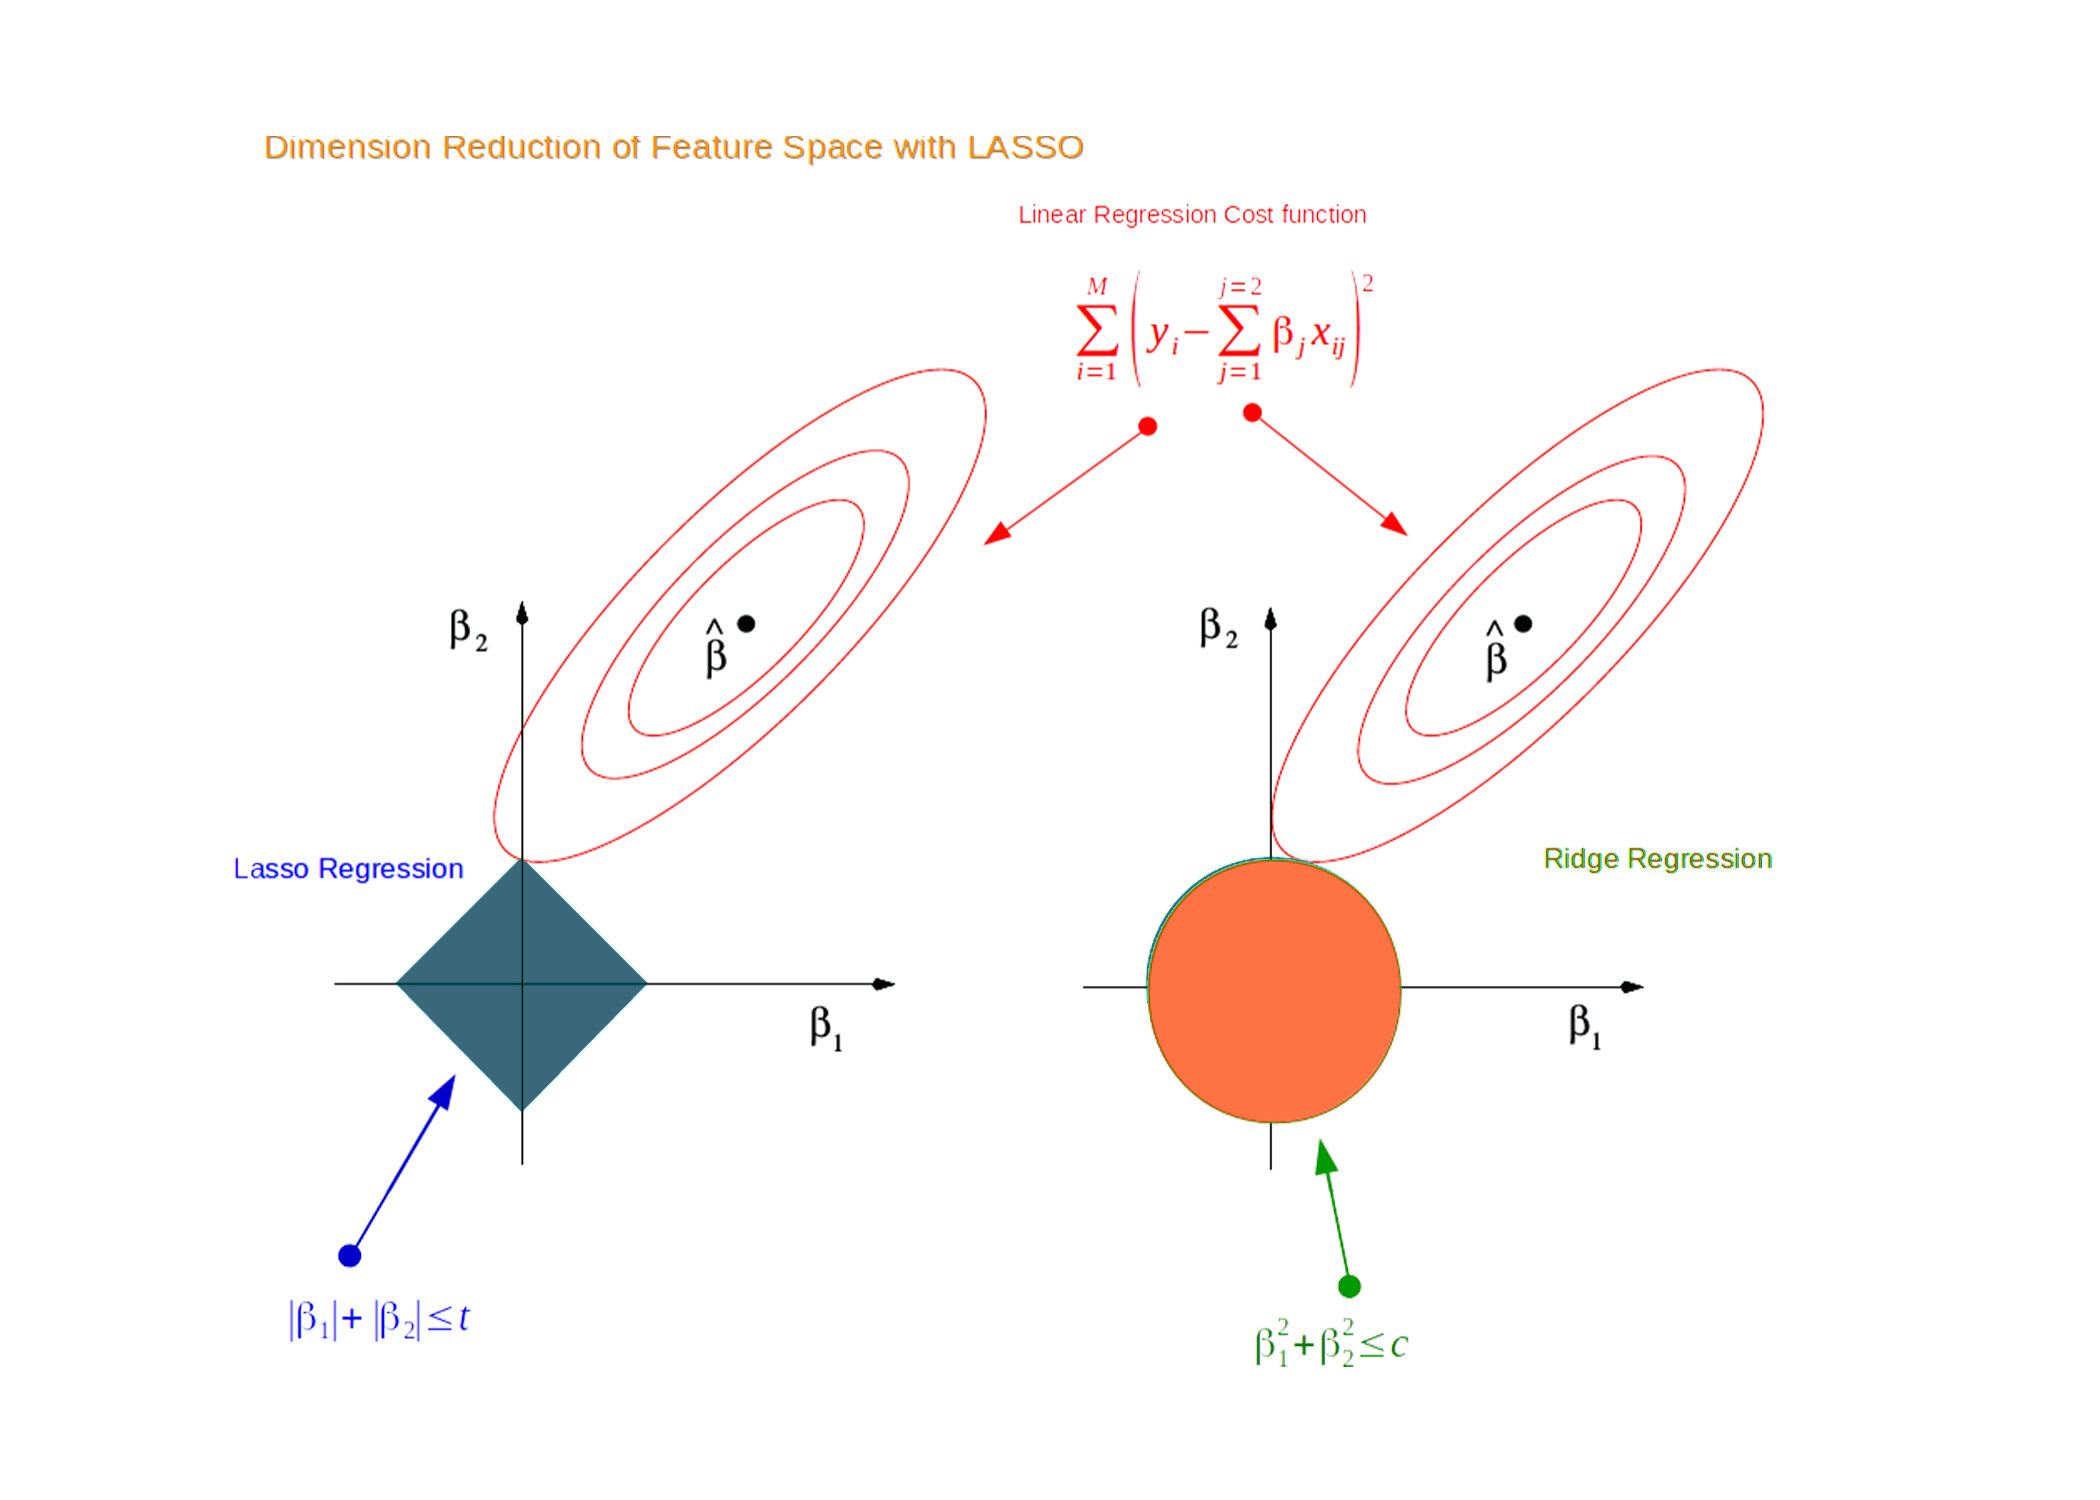

Since we know that in ridge regression the coefficients can’t be zero. Here, we either consider all the coefficients or none of the coefficients, whereas Lasso regression algorithm technique, performs both parameter shrinkage and feature selection simultaneously and automatically because it nulls out the co-efficients of collinear features. This helps to select the variable(s) out of given n variables while performing lasso regression easier and more accurate.

There is an another type of regularization method, which is ElasticNet, this algorithm is a hybrid of lasso and ridge regression both. It is trained using L1 and L2 prior as regularizer. A practical advantage of trading-off between the Lasso and Ridge regression is that it allows Elastic-Net Algorithm to inherit some of Ridge’s stability under rotation.